### Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil as su
import random as rd
import cv2

## Load data

In [3]:
%%bash
mkdir -p tmp_data
rm -rf tmp_data/*
mkdir -p tmp_data/train_set
mkdir -p tmp_data/test_set

## Separate training dataset

In [4]:
def separate_data(path, nb_elements=1):
    """
    Separate given data in `path` in two sets with `nb_elements` per class for test

    Parameters
    ----------
    path: str
        Path to directory where dataset files are stored.

    nb_elements: integer
        Defines the number of test images taken in each class of the dataset
    """
    labels_path = os.path.join(path, "labels.txt")
    images_path = path
    test_path = 'tmp_data/test_set'
    train_path = 'tmp_data/train_set'

    
    labels = np.empty((0, 1))
    names = np.empty((0, 1))
    with open(labels_path) as f:
        for current_label in f:
            if current_label == "\n":
                continue
            label, name = current_label.split(": ")
            labels = np.append(labels, label)
            names = np.append(names, name)

    for label in labels:
        pre_label = 'img_' + label + '_'
        curr_test_path = os.path.join(test_path, label)
        curr_train_path = os.path.join(train_path, label)
        os.makedirs(curr_test_path, exist_ok=True)
        os.makedirs(curr_train_path, exist_ok=True)

        current_path = os.path.join(images_path, label)
        datas = os.listdir(current_path)
        rd.shuffle(datas)

        count = 0
        for data in datas:
            data_path = os.path.join(current_path, data)
            if count < nb_elements:
                su.copyfile(data_path, os.path.join(curr_test_path, pre_label + str(count) + '.png'))
            else:
                su.copyfile(data_path, os.path.join(curr_train_path, pre_label + str(count - nb_elements) + '.png'))
            count += 1

    return labels, names

In [5]:
ref = separate_data('ressources/train', 2)

## Get separated datasets

In [6]:
def get_datasets(kind='train'):
    """
    Returns `kind` set and their label

    Parameters
    ----------
    kind: str (train or test)
        Type of dataset we want to get
    """
    assert kind == 'train' or kind == 'test'
    dataset_path = 'tmp_data/train_set' if kind == 'train' else 'tmp_data/test_set'
    
    images = []
    labels = []
    dirs = os.listdir(dataset_path)

    for folder in dirs : 
        curr_path = os.path.join(dataset_path, folder)
        datas = os.listdir(curr_path)
        for data in datas:
            data_path = os.path.join(curr_path, data)
            img = cv2.imread(data_path);
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
            images.append(img)
            labels.append(folder)
    
    return labels, images

In [7]:
train_labels, train_images = get_datasets('train')
test_labels, test_images = get_datasets('test')

## Shuffle datasets

In [8]:
def shuffle_set(labels, images):
    """
    Shuffles equally labels and images

    Parameters
    ----------
    labels: [str]
        Dataset's labels
        
    images: [image]
        Dataset's images
    """
    assert len(labels) == len(images)
    shuffle_index = np.arange(len(labels))
    np.random.shuffle(shuffle_index)
    new_labels = np.array(labels)
    new_images = np.array(images, dtype=object)
    
    for ii in range(shuffle_index.size):
        new_labels[ii] = labels[shuffle_index[ii]]
        new_images[ii] = images[shuffle_index[ii]]
        
    return new_labels, new_images

In [9]:
train_labels, train_images = shuffle_set(train_labels, train_images)
test_labels, test_images = shuffle_set(test_labels, test_images)

## Print train example

40
['coccinelle\n']


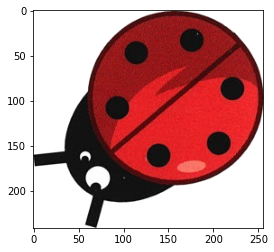

In [10]:
print(train_labels[0])
plt.imshow(train_images[0])
print(ref[1][np.where(ref[0] == train_labels[0])])

## Print test example

51
['clef de porte\n']


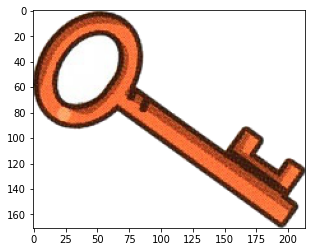

In [11]:
print(test_labels[0])
plt.imshow(test_images[0])
print(ref[1][np.where(ref[0] == test_labels[0])])

## Find all indices for a label

In [12]:
def find_all_labeled(label, labels):
    """
    Returns all indices of element like `label` in `labels`

    Parameters
    ----------
    label: str
        Searched label
    
    labels: [str]
        Dataset's labels
    """
    indices = []
    for i in range(labels.size):
        if labels[i] == label:
            indices.append(i)
    return indices

find_all_labeled(train_labels[0], train_labels)

[0, 85, 122]

## Summary

If you executed all of the above, you defined the following variables:

```python
ref # couple:
    ref[0] # labels' identifiers
    ref[1] # labels

train_labels # train dataset's images' identifiers for labels

train_images # train dataset's images

test_labels # test dataset's images' identifiers for labels

test_images # test dataset's images
```

## Color histogram
### 1. Color quantization

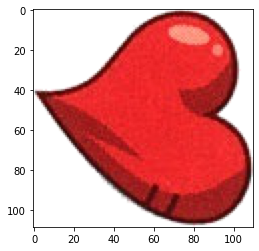

In [13]:
def get_each_image() :
    """
    Return one image of each type with corresponding labels
    """
    PATH_TO_RESOURCES = "ressources/train"
    images = []
    dirs = os.listdir(PATH_TO_RESOURCES)
    labels = []
    for name_dir in dirs : 
        if name_dir == "labels.txt" :
            continue
        actual_path = os.path.join(PATH_TO_RESOURCES, name_dir)
        img_name = os.listdir(actual_path)[0]
        img = cv2.imread(os.path.join(actual_path, img_name));
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
        images.append(img)
        labels.append(name_dir)
    return images, labels

each_images, each_labels = get_each_image()
plt.imshow(each_images[52])

(250, 14250, 3)

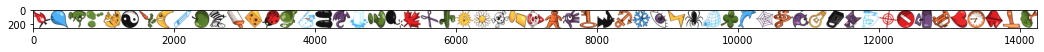

In [14]:
def create_poster(images) : 
    """
    Return a poster containing all images and a corresponding mask
    
    Parameters
    ----------        
    images: [image]
        Dataset's images
    """
    sizeImg = 250
    img0 = cv2.resize(images[0], (sizeImg, sizeImg))
    poster = img0
    first = True
    for img in images : 
        if first : 
            first = False
            continue
        img = cv2.resize(img, (sizeImg, sizeImg))
        poster = cv2.hconcat([poster, img])
    
    # Create a mask for the poster generated 
    poster_mask = np.zeros(poster.shape[0] * poster.shape[1])
    for i in range(poster.shape[0]) : 
        for j in range(poster.shape[1]) : 
            poster_mask[i * poster.shape[0] +  j] = np.all(poster[i, j] != 255)
    
    return poster, poster_mask

poster, poster_mask = create_poster(each_images)
plt.figure(figsize=(18,18))
plt.imshow(poster)
poster.shape

In [15]:
from sklearn.cluster import KMeans

def train_kmeans(poster, nb_colors) :
    """
    'Train' kmeans using poster's colors 
    Parameters
    ----------
    poster: image
        
    nb_colors: int
        Number of clusters for kmeans
    """
    plane_poster = poster.reshape(len(poster) * len(poster[0]), 3)
    kmeans = KMeans(n_clusters=nb_colors, random_state=0)
    kmeans.fit(plane_poster)
    kmeans.cluster_centers_
    label_map = kmeans.predict(plane_poster)
    return kmeans, label_map

kmeans, label_map = train_kmeans(poster, 10)

<BarContainer object of 10 artists>

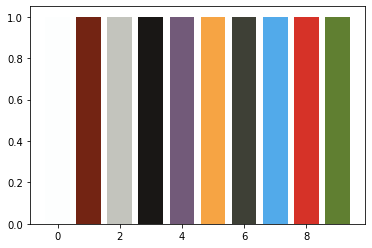

In [16]:
color_lut = np.uint8(kmeans.cluster_centers_)
plt.bar(np.arange(len(color_lut)), 
         np.ones(len(color_lut)), 
         color=color_lut/255)

### 2. Color histograms

In [17]:
def reduce_color(img, kmeans) : 
    """
    Reduce the colors in an image
    
    Parameters
    ----------
    img: image
        Reference image
    kmeans: Kmeans
        kmeans used to determine new colors
    """
    newImg = np.zeros_like((0, 0, 0), shape=img.shape)
    prediction = kmeans.predict(img.reshape(len(img) * len(img[0]), 3))
    histo = np.zeros(len(kmeans.cluster_centers_))
    for i in range(len(img)) : 
        for j in range(len(img[0])) :
            if img[i, j][0] == 255 and img[i, j][1] == 255 and img[i, j][2] == 255: 
                newImg[i, j] = [255, 255,255]
            else :
                newImg[i, j] = kmeans.cluster_centers_[prediction[i * len(img[0]) + j]]
                histo[prediction[i * len(img[0]) + j]] += 1
    return newImg, histo

def normalize_histogram(histo) : 
    """
    Normalize histogram
    
    Parameter
    ----------
    histo: [int]
        image histogram
    """
    nbPixels = np.sum(histo)
    for i in range(len(histo)) : 
        if histo[i] != 0 :
            histo[i] = histo[i] / nbPixels
    return histo

In [18]:
# Reduce color of all images
images_quant = []
color_histograms = []
for i in range(len(each_images)) : 
    newImg, histo = reduce_color(each_images[i], kmeans)
    images_quant.append(newImg)
    # Normalise histogram
    histo = normalize_histogram(histo)
    color_histograms.append(histo) 

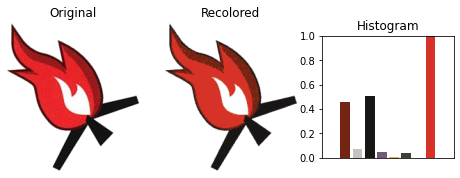

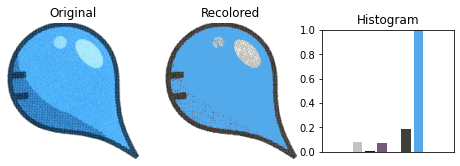

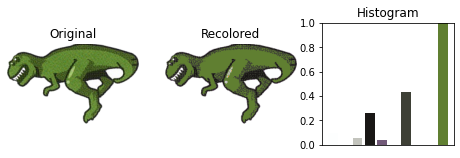

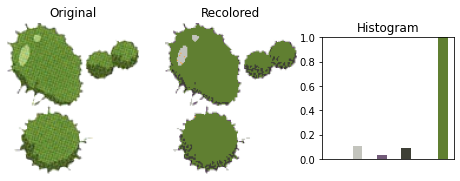

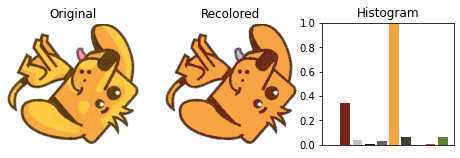

In [19]:
# Show some color histograms with colors!
colors_for_bars = color_lut/255  # matplotlib colors are RGB values scaled to [0,1]
for ii in range(5):
    plt.figure(figsize=(8,4))
    plt.subplot(1,3,1)
    plt.imshow(each_images[ii])
    plt.axis('off'); plt.title("Original")
    plt.subplot(1,3,2)
    plt.imshow(images_quant[ii])
    plt.axis('off'); plt.title("Recolored")
    plt.subplot(1,3,3, aspect=len(color_histograms[0]))
    plt.ylim(0, 1)
    plt.bar(range(len(color_histograms[ii])), 
            color_histograms[ii]/color_histograms[ii].max(), 
            color=colors_for_bars)
    plt.xticks([]); plt.title("Histogram")
    plt.show()

### Test without classifier just using histogram comparison

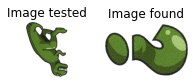

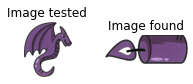

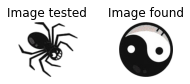

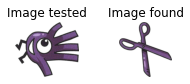

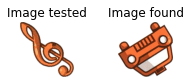

Accuracy:  0.96


In [20]:
import scipy as sc

good_result = 0
for i in range(len(test_images)) : 
    test_img = test_images[i]
    test_img_recolored, test_histo = reduce_color(test_img, kmeans)
    test_histo = normalize_histogram(test_histo)
    minimal_distance = sc.spatial.distance.pdist(np.vstack((test_histo, color_histograms[0])))
    best_index = 0
    
    for j in range(1, len(color_histograms)) :
        dist = sc.spatial.distance.pdist(np.vstack((test_histo, color_histograms[j])))
        if dist < minimal_distance : 
            minimal_distance = dist 
            best_index = j
    # Check que le result est bon
    if test_labels[i] == each_labels[best_index] :
        good_result += 1
    else :
        plt.figure(figsize=(5,1))
        plt.subplot(1,3, 1)
        plt.imshow(test_img)
        plt.axis('off'); plt.title("Image tested")
        plt.subplot(1,3,2)
        plt.imshow(each_images[best_index])
        plt.axis('off'); plt.title("Image found")
        plt.show()
    
accuracy = good_result / len(test_images)
print("Accuracy: ", round(accuracy, 2))

### Test linear classifier

In [21]:
# Get images histograms
def get_images_histograms(images) : 
    histograms = []
    for i in range(len(images)) : 
        actual_img = images[i]
        actual_img_recolored, img_histo = reduce_color(actual_img, kmeans)
        actual_histo = normalize_histogram(img_histo)
        histograms.append(actual_histo)
    return histograms

train_histograms = get_images_histograms(train_images)
test_histograms = get_images_histograms(test_images)

In [22]:
import sklearn as sk
import sklearn.dummy
import sklearn.ensemble

def classifier_test(clf, clf_name) : 
    clf.fit(train_histograms, train_labels)
    label_pred = clf.predict(test_histograms)

    good = 0
    for i in range(len(label_pred)) : 
        if label_pred[i] == test_labels[i] :
            good += 1
    accuracy = good / len(label_pred)
    print(clf_name + '. Accuracy:', round(accuracy, 3))

print("Test de différents classifiers :\n")
clf = sk.svm.LinearSVC()
classifier_test(clf, "Linear SVC")
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=1)
classifier_test(clf, "KNeighbors (1 neighbor)")
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=5)
classifier_test(clf, "KNeighbors (3 neighbors)")
classifier_test(sk.dummy.DummyClassifier(), "Dummy")
classifier_test(sk.ensemble.RandomForestClassifier(n_estimators=10), "RandomForest (10 estimators)")
classifier_test(sk.ensemble.RandomForestClassifier(n_estimators=100), "RandomForest (100 estimators)")
classifier_test(sk.ensemble.RandomForestClassifier(n_estimators=57), "RandomForest (57 estimators)")


Test de différents classifiers :

Linear SVC. Accuracy: 0.474
KNeighbors (1 neighbor). Accuracy: 0.991
KNeighbors (3 neighbors). Accuracy: 0.939
Dummy. Accuracy: 0.018
RandomForest (10 estimators). Accuracy: 0.912
RandomForest (100 estimators). Accuracy: 0.974
RandomForest (57 estimators). Accuracy: 0.974


In [23]:
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_histograms, train_labels)
probas = clf.predict_proba(test_histograms)

print("Errors found and corresponding probabilities.\n")
for i in range(len(probas)) :
    label_pred = clf.classes_[np.where(probas[i] == np.amax(probas[i]))]
    if label_pred[0] != test_labels[i] :
        labels_proba = ""
        for j in range(len(probas[0])) : 
            if probas[i][j] > 0 : 
                label = clf.classes_[j]
                labels_proba += label + "/" + str(probas[i][j]) + "; "
        print("Label wanted:", test_labels[i], ". Labels get/proba: ", labels_proba)

Errors found and corresponding probabilities.

Label wanted: 06 . Labels get/proba:  06/0.4; 12/0.6; 
Label wanted: 15 . Labels get/proba:  15/0.4; 57/0.6; 
Label wanted: 55 . Labels get/proba:  10/0.4; 31/0.2; 55/0.4; 
Label wanted: 45 . Labels get/proba:  18/0.6; 45/0.4; 
Label wanted: 49 . Labels get/proba:  38/0.6; 49/0.4; 
Label wanted: 37 . Labels get/proba:  28/0.6; 37/0.4; 
Label wanted: 43 . Labels get/proba:  31/0.6; 43/0.4; 


## Shape matching
### 1. Hu moments
#### Image treatment

In [24]:
def grayscale(img):
    return np.dot(img[..., :3], [.299, .587, .114])

In [25]:
def inverted(img):
    img = img.copy()
    for ii in range(len(img)):
        for jj in range(len(img[0])):
            img[ii][jj] = 255 - img[ii][jj]
    
    return img

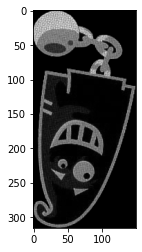

In [26]:
plt.imshow(inverted(grayscale(test_images[11])), cmap = 'gray')

#### Moments

In [27]:
def raw_moment(i, j, img):
    moment = 0
    for y in range(len(img)):
        for x in range(len(img[0])):
            moment += x ** i * y ** j * img[y][x]
    return moment

In [28]:
def central_moment(i, j, img):
    avg_moment = raw_moment(0, 0, img)
    x_centroid = raw_moment(1, 0, img) / avg_moment
    y_centroid = raw_moment(0, 1, img) / avg_moment
    
    moment = 0
    for y in range(len(img)):
        for x in range(len(img[0])):
            moment += (x - x_centroid) ** i * (y - y_centroid) ** j * img[y][x]
    return moment

In [29]:
def central_moment_opt(centroid, i, j, img):
    moment = 0
    for y in range(len(img)):
        for x in range(len(img[0])):
            moment += (x - centroid[0]) ** i * (y - centroid[1]) ** j * img[y][x]
    return moment

In [30]:
def scale_invariant_moment(i, j, img):
    assert i + j >= 2
    return central_moment(i, j, img) / central_moment(0, 0, img) ** (1 + (i + j) / 2)

In [31]:
def scale_invariant_moment_opt(centroid, c0, i, j, img):
    assert i + j >= 2
    return central_moment_opt(centroid, i, j, img) / c0 ** (1 + (i + j) / 2)

#### Hu Moments

In [32]:
def hu_moments(img):
    img_gray = inverted(grayscale(img))
    
    nu20 = scale_invariant_moment(2, 0, img_gray)
    nu11 = scale_invariant_moment(1, 1, img_gray)
    nu02 = scale_invariant_moment(0, 2, img_gray)
    nu30 = scale_invariant_moment(3, 0, img_gray)
    nu21 = scale_invariant_moment(2, 1, img_gray)
    nu12 = scale_invariant_moment(1, 2, img_gray)
    nu03 = scale_invariant_moment(0, 3, img_gray)
    
    I0 = (nu20 + nu02)
    
    I1 = ((nu20 - nu02) ** 2 +
          4 * nu11 ** 2)
    
    I2 = ((nu30 - 3 * nu12) ** 2 +
          (3 * nu21 - nu03) ** 2)
    
    I3 = ((nu30 + nu12) ** 2 +
          (nu21 + nu03) ** 2)
    
    I4 = ((nu30 - 3 * nu12) * (nu30 + nu12) *
          ((nu30 + nu12) ** 2 - 3 * (nu21 + nu03) ** 2) +
          (3 * nu21 - nu03) * (nu21 + nu03) *
          (3 * (nu30 + nu12) ** 2 - (nu21 + nu03) ** 2))
    
    I5 = ((nu20 - nu02) * ((nu30 + nu12) ** 2 - (nu21 + nu03) ** 2) +
          4 * nu11 * (nu30 + nu12) * (nu21 + nu03))
    
    I6 = ((3 * nu21 - nu03) * (nu30 + nu12) *
          ((nu30 + nu12) ** 2 - 3 * (nu21 + nu03) ** 2) -
          (nu30 - 3 * nu12) * (nu21 + nu03) *
          (3 * (nu30 + nu12) ** 2 - (nu21 + nu03) ** 2))
    
    return [I0, I1, I2, I3, I4, I5, I6]

In [33]:
def hu_moments_opt(img):
    img_gray = inverted(grayscale(img))
    
    avg = raw_moment(0, 0, img_gray)
    centroid = (raw_moment(1, 0, img_gray) / avg, raw_moment(0, 1, img_gray) / avg)
    
    c0 = central_moment_opt(centroid, 0, 0, img_gray)
    
    nu20 = scale_invariant_moment_opt(centroid, c0, 2, 0, img_gray)
    nu11 = scale_invariant_moment_opt(centroid, c0, 1, 1, img_gray)
    nu02 = scale_invariant_moment_opt(centroid, c0, 0, 2, img_gray)
    nu30 = scale_invariant_moment_opt(centroid, c0, 3, 0, img_gray)
    nu21 = scale_invariant_moment_opt(centroid, c0, 2, 1, img_gray)
    nu12 = scale_invariant_moment_opt(centroid, c0, 1, 2, img_gray)
    nu03 = scale_invariant_moment_opt(centroid, c0, 0, 3, img_gray)
    
    hu = np.zeros(7)
    
    t0 = nu30 + nu12;
    t1 = nu21 + nu03;

    q0 = t0 * t0
    q1 = t1 * t1;

    n4 = 4 * nu11;
    s = nu20 + nu02;
    d = nu20 - nu02;

    hu[0] = s;
    hu[1] = d * d + n4 * nu11;
    hu[3] = q0 + q1;
    hu[5] = d * (q0 - q1) + n4 * t0 * t1;

    t0 *= q0 - 3 * q1;
    t1 *= 3 * q0 - q1;

    q0 = nu30 - 3 * nu12;
    q1 = 3 * nu21 - nu03;

    hu[2] = q0 * q0 + q1 * q1;
    hu[4] = q0 * t0 + q1 * t1;
    hu[6] = q1 * t0 - q0 * t1;
    
    return hu

In [34]:
def compute_moments_diff(hu_1, hu_2):
    diff = 0
    for i in range(7):
        diff += (hu_2[i] - hu_1[i]) ** 2
        
    return math.sqrt(diff)

In [35]:
def moments_from(images):
    hu_mo = np.zeros((len(images), 7))
    for ii in range(len(images)):
        hu_mo[ii] = hu_moments_opt(images[ii])
    return hu_mo * 1e6

#### Classifiers

In [36]:
train_moments = moments_from(train_images)

In [37]:
test_moments = moments_from(test_images)

In [38]:
from sklearn.dummy import DummyClassifier

km = DummyClassifier().fit(train_moments, train_labels) # 56%
km.score(test_moments, test_labels)

0.017543859649122806

In [39]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

km = make_pipeline(StandardScaler(), LinearSVC(max_iter=1500)).fit(train_moments, train_labels) # 29%
km.score(test_moments, test_labels)

0.2807017543859649

In [40]:
from sklearn.neighbors import KNeighborsClassifier

km = KNeighborsClassifier(n_neighbors=6).fit(train_moments, train_labels) # 46%
km.score(test_moments, test_labels)

0.45614035087719296

In [41]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

km = make_pipeline(StandardScaler(), SVC()).fit(train_moments, train_labels) # 87%
km.score(test_moments, test_labels)

0.8947368421052632

In [42]:
from sklearn.ensemble import RandomForestClassifier

km = RandomForestClassifier().fit(train_moments, train_labels) # 100%
km.score(test_moments, test_labels)

0.9824561403508771

In [43]:
print(km.predict_proba(test_moments)[2])
print(km.classes_)
print(km.predict(test_moments)[2])

[0.00000000e+00 5.42467077e-04 1.47827893e-03 1.90806597e-03
 1.45262731e-03 0.00000000e+00 0.00000000e+00 1.94789548e-03
 0.00000000e+00 2.56891618e-03 3.77358491e-04 0.00000000e+00
 5.61797753e-04 0.00000000e+00 2.98648553e-03 2.46214682e-03
 4.70570097e-03 3.56837594e-03 0.00000000e+00 2.05291893e-02
 8.84220811e-04 7.72018847e-04 1.09943216e-03 3.57481426e-03
 1.27136771e-03 1.21830801e-03 4.34716329e-03 2.01231420e-03
 1.13644605e-03 0.00000000e+00 1.74853548e-03 0.00000000e+00
 8.44675419e-01 1.20111034e-02 1.09238090e-02 1.80400016e-03
 0.00000000e+00 3.63571760e-03 1.01686061e-03 1.17764716e-03
 1.85867280e-03 0.00000000e+00 2.66266120e-03 4.30549076e-02
 0.00000000e+00 3.23740703e-03 3.99251189e-03 0.00000000e+00
 1.32273207e-03 1.74558587e-03 0.00000000e+00 1.11817015e-03
 1.01925383e-03 0.00000000e+00 1.58961361e-03 0.00000000e+00
 0.00000000e+00]
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '2

## Early Fusion

### Color histogram & Hu moments

In [44]:
train_early = [np.concatenate((train_histograms[i], train_moments[i])) for i in range(len(train_moments))]
test_early = [np.concatenate((test_histograms[i], test_moments[i])) for i in range(len(test_moments))]

In [45]:
from sklearn.dummy import DummyClassifier

early_classifier = DummyClassifier().fit(train_early, train_labels)
early_classifier.score(test_early, test_labels)

0.017543859649122806

In [46]:
from sklearn.neighbors import KNeighborsClassifier

early_classifier = KNeighborsClassifier(n_neighbors=4).fit(train_early, train_labels)
early_classifier.score(test_early, test_labels)

0.5175438596491229

In [47]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

early_classifier = make_pipeline(StandardScaler(), SVC()).fit(train_early, train_labels)
early_classifier.score(test_early, test_labels)

0.9824561403508771

In [48]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

early_classifier = make_pipeline(StandardScaler(), LinearSVC(max_iter=1500)).fit(train_early, train_labels)
early_classifier.score(test_early, test_labels)

/home/antoinea/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9736842105263158

In [49]:
from sklearn.ensemble import RandomForestClassifier

early_classifier = RandomForestClassifier().fit(train_early, train_labels)
early_classifier.score(test_early, test_labels)

1.0

## Late Fusion

### Color histogram & Hu moments

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

col_classifier = KNeighborsClassifier(n_neighbors=5).fit(train_histograms, train_labels)
hu_classifier = RandomForestClassifier().fit(train_moments, train_labels)

In [51]:
col_results = col_classifier.predict_proba(test_histograms), col_classifier.classes_
hu_results = hu_classifier.predict_proba(test_moments), hu_classifier.classes_

In [52]:
results = col_results[0] + hu_results[0], col_results[1]

final = np.empty(len(results[0]), dtype='object')
for ii in range(results[0].shape[0]):
    imax = results[0][ii]
    final[ii] = col_results[1][imax.argmax()]

In [53]:
#Classifier save for test program
import joblib 

joblib.dump(col_classifier, "color_clf.save")
jobilb.dump(hu_classifier, "hu_clf.save")

NameError: name 'jobilb' is not defined